## Visualizing raw data in MAAP

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# import the maap package to handle the queries
from maap.maap import MAAP

In [3]:
# envoke the MAAP search client
maap = MAAP()

### Searching for a dataset

In [4]:
# search the maap data repo for all data that is associated with the Mondah Forest site
response = maap.searchGranule(site_name='Mondah Forest Gabon')

In [5]:
# viewing the results
print(f"Number of images found: {len(response)}")
print(f"\nFirst image:")
response[0]

Number of images found: 20

First image:


{'concept-id': 'G1200115791-NASA_MAAP',
 'collection-concept-id': 'C1200115768-NASA_MAAP',
 'revision-id': '2',
 'format': 'application/echo10+xml',
 'Granule': {'GranuleUR': 'AfriSAR_AGB_Maps.Mondah_AGB_50m.tif',
  'InsertTime': '2019-05-10T00:00:00Z',
  'LastUpdate': '2019-05-13T12:45:07Z',
  'Collection': {'ShortName': 'AfriSAR_AGB_Maps_1681', 'VersionId': '1'},
  'DataGranule': {'SizeMBDataGranule': '0.249846',
   'DayNightFlag': 'BOTH',
   'ProductionDateTime': '2019-05-10T00:00:00Z'},
  'Temporal': {'RangeDateTime': {'BeginningDateTime': '2016-02-01T00:00:00Z',
    'EndingDateTime': '2016-03-31T23:59:59Z'}},
  'Spatial': {'HorizontalSpatialDomain': {'Geometry': {'BoundingRectangle': {'WestBoundingCoordinate': '9.30308',
      'NorthBoundingCoordinate': '0.611119',
      'EastBoundingCoordinate': '9.46755',
      'SouthBoundingCoordinate': '0.519733'}}}},
  'MeasuredParameters': {'MeasuredParameter': [{'ParameterName': 'FORESTS'},
    {'ParameterName': 'CARBON'},
    {'ParameterNa

In [6]:
# pull the data to local directory
response[0].getLocalPath('.')

'./Mondah_AGB_50m.tif'

### Vizualizing a tiff file

In [7]:
# import a package to open the tiff file
from PIL import Image
im = Image.open('Mondah_AGB_50m.tif')

In [8]:
# convert image to numpy.ndarray type
arr = np.array(im)

# find no data values and mask nodata
nodata = arr.min()
arr[arr==nodata] = np.nan

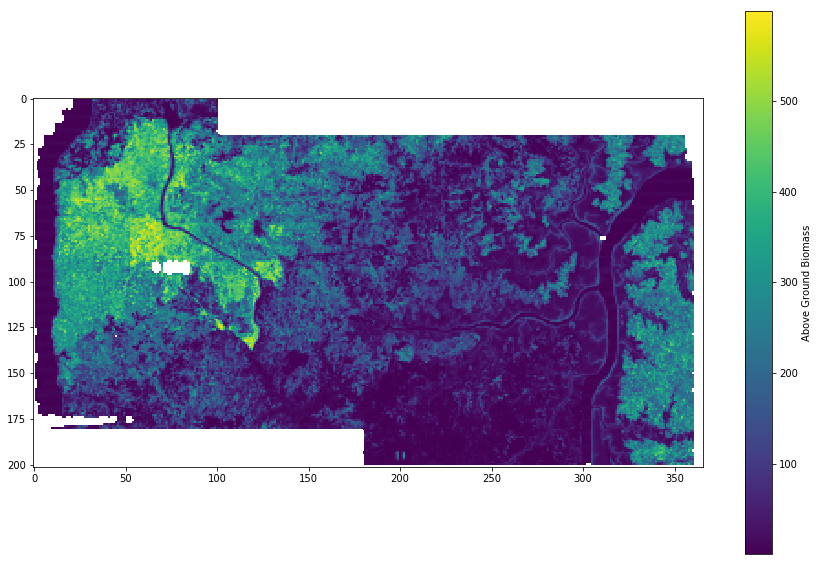

In [9]:
# create a matplotlib figure and display the image
fig = plt.figure(figsize=(15,10))
cm = plt.imshow(arr)
cm = plt.colorbar(cm)
cm.set_label(f"Above Ground Biomass")
fig.show()